In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

In [3]:
# Load the data
df = pd.read_csv('data - Copy.csv')
df

,Date,Price
0,1/1/2005,3847.333333
1,1/2/2005,3848.666667
2,1/3/2005,3850.000000
3,1/4/2005,3850.000000
4,1/5/2005,3848.000000
...,...,...
6361,6/2/2022,4051.000000
6362,6/3/2022,4050.000000
6363,6/4/2022,4050.333333
6364,6/5/2022,4050.666667


In [4]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
# Set the Date column as index
df.set_index('Date', inplace=True)

In [6]:
# Split the data into train and test datasets
train_df = df.loc[df.index < '2021-06-06', :]
test_df = df.loc[df.index >= '2021-06-06', :]

In [7]:
# Scale the data
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_df)
test_data = scaler.transform(test_df)

In [8]:
# Create function to generate sequences for LSTM model
def generate_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, :])
        y.append(data[i, 0])
    X, y = np.array(X), np.array(y)
    return X, y

In [9]:
# Generate sequences for training and testing data
window_size = 60
X_train, y_train = generate_sequences(train_data, window_size)
X_test, y_test = generate_sequences(test_data, window_size)

In [17]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(16))
model.add(Dense(1))

In [18]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [19]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [20]:
# Make predictions on the test data
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 5ms/step


In [14]:
# Calculate the error metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred))

In [15]:
# Print the error metrics
print(f'MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}')

MSE: 0.51, RMSE: 0.71, MAE: 0.71


In [21]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
93/93 [==============================] - 3s 24ms/step - loss: 0.0189 - mae: 0.0794 - val_loss: 1.9488e-04 - val_mae: 0.0098
Epoch 2/50
93/93 [==============================] - 2s 21ms/step - loss: 0.0017 - mae: 0.0283 - val_loss: 1.1829e-04 - val_mae: 0.0072
Epoch 3/50
93/93 [==============================] - 2s 21ms/step - loss: 0.0014 - mae: 0.0242 - val_loss: 1.2469e-04 - val_mae: 0.0079
Epoch 4/50
93/93 [==============================] - 2s 21ms/step - loss: 0.0014 - mae: 0.0235 - val_loss: 1.1085e-04 - val_mae: 0.0070
Epoch 5/50
93/93 [==============================] - 2s 21ms/step - loss: 0.0013 - mae: 0.0230 - val_loss: 1.1465e-04 - val_mae: 0.0075
Epoch 6/50
93/93 [==============================] - 2s 21ms/step - loss: 0.0013 - mae: 0.0224 - val_loss: 1.3892e-04 - val_mae: 0.0084
Epoch 7/50
93/93 [==============================] - 2s 21ms/step - loss: 0.0012 - mae: 0.0219 - val_loss: 1.0036e-04 - val_mae: 0.0066
Epoch 8/50
93/93 [==============================] - 2s 

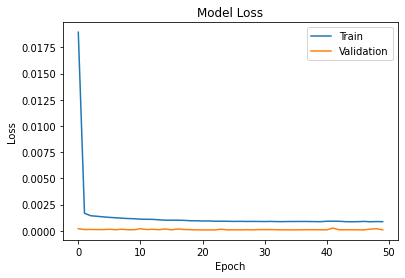

In [22]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [31]:
# Make predictions for the next 10 days
last60days = test_data[-60:, :]
predicted_prices = []
for i in range(1000):
    next_day = model.predict(last60days.reshape(1, window_size, 1))
    predicted_prices.append(scaler.inverse_transform(next_day)[0][0])
    last60days = np.append(last60days[1:], next_day, axis=0)

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


In [34]:
# Print the predicted prices
print('Next 10 predicted closing prices from 2022-06-07:')
for price in predicted_prices:
    print(f'{price:.2f}')

Next 10 predicted closing prices from 2022-06-07:
4051.32
4051.57
4051.79
4051.99
4052.18
4052.36
4052.54
4052.72
4052.90
4053.08
4053.26
4053.44
4053.61
4053.79
4053.96
4054.14
4054.31
4054.47
4054.64
4054.81
4054.97
4055.14
4055.30
4055.46
4055.62
4055.77
4055.93
4056.08
4056.23
4056.39
4056.54
4056.68
4056.83
4056.98
4057.12
4057.27
4057.41
4057.55
4057.69
4057.83
4057.96
4058.10
4058.23
4058.36
4058.50
4058.63
4058.75
4058.88
4059.01
4059.14
4059.26
4059.38
4059.51
4059.63
4059.75
4059.86
4059.98
4060.10
4060.21
4060.33
4060.44
4060.56
4060.67
4060.78
4060.89
4060.99
4061.10
4061.21
4061.31
4061.42
4061.52
4061.62
4061.73
4061.83
4061.93
4062.02
4062.12
4062.22
4062.31
4062.41
4062.50
4062.60
4062.69
4062.78
4062.87
4062.96
4063.05
4063.14
4063.23
4063.32
4063.40
4063.49
4063.57
4063.65
4063.74
4063.82
4063.90
4063.98
4064.06
4064.14
4064.22
4064.30
4064.37
4064.45
4064.53
4064.60
4064.68
4064.75
4064.82
4064.90
4064.97
4065.04
4065.11
4065.18
4065.25
4065.32
4065.38
4065.45
4065.5

In [25]:
# Save the model
model.save('model1.h5')

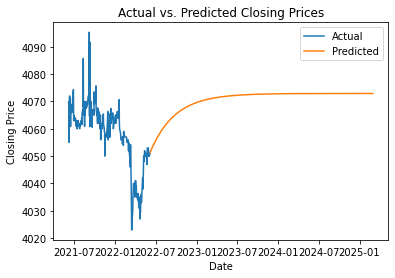

In [35]:
# Get the original test data prices
test_prices = test_df['Price'].values

# Create an array of datetime values for the next 10 days
dates = pd.date_range(start='2022-06-07', periods=1000, freq='D').values

# Plot the actual prices and the predicted prices
plt.plot(test_df.index, test_prices, label='Actual')
plt.plot(dates, predicted_prices, label='Predicted')
plt.title('Actual vs. Predicted Closing Prices')
plt.ylabel('Closing Price')
plt.xlabel('Date')
plt.legend()
plt.show()